In [21]:
import nltk
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer # Exploring
from nltk.stem import SnowballStemmer
import spacy
import re
from nltk.corpus import wordnet as wn
from collections import defaultdict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import matplotlib.pyplot as plt
import re # regex
from wordcloud import WordCloud
import seaborn as sns

In [24]:
#merged = pd.concat([df_fake, df_true], axis =0 )
merged = pd.read_csv("/content/drive/MyDrive/Thesis/Naive_bayes/data/WELFake_Dataset.csv")
merged.head(5)


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [25]:
merged['label'].value_counts()

1    37106
0    35028
Name: label, dtype: int64

In [26]:
df = merged.drop(["title", "Unnamed: 0"], axis = 1)

In [27]:
df.isnull().sum()
df.dropna(inplace=True)

In [28]:
df = df.sample(frac = 1)   # randomly shuffle the dataframe

In [29]:
df.head()

,text,label
19302,After Donald Trump gave out Lindsey Graham s c...,1
17020,"On Thursday, thanks to strange Senate rules, J...",1
55955,Here are the top 10 comments of the week on ou...,0
49678,"Updated, 7:48 p. m. Good evening on this Tue...",0
25464,The way the lawyer William Timmons described t...,0


<Axes: xlabel='label', ylabel='count'>

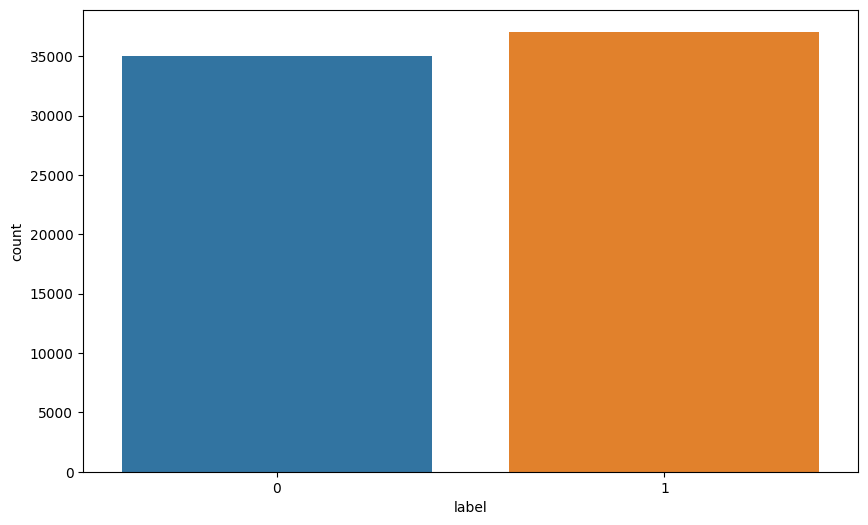

In [30]:
np.random.seed(2023)
plt.figure(figsize=(10,6))
sns.countplot(x = 'label',data=df)
# 1 is fake real is 0

In [31]:
# clean up the string data, remove the special chars and clean strigns
def remove_special(text):
      if isinstance(text, str):
        text = text.lower()  # Convert text to lower case
        # Combine multiple re.sub() calls into a single call for efficiency
        # This pattern removes URLs, HTML tags, numbers mixed with words, and punctuation
        pattern = r'\[.*?\]|https?://\S+|www\.\S+|<.*?>+|\w*\d\w*|[%s]' % re.escape(string.punctuation)
        text = re.sub(pattern, ' ', text)
        # Replace non-word characters (excluding space) with a space
        text = re.sub(r'\W+', ' ', text)
        # Remove newlines
        text = text.replace('\n', ' ')
        return text.strip()  # Remove leading/trailing whitespace


In [32]:
df["text"] = df["text"].apply(remove_special)

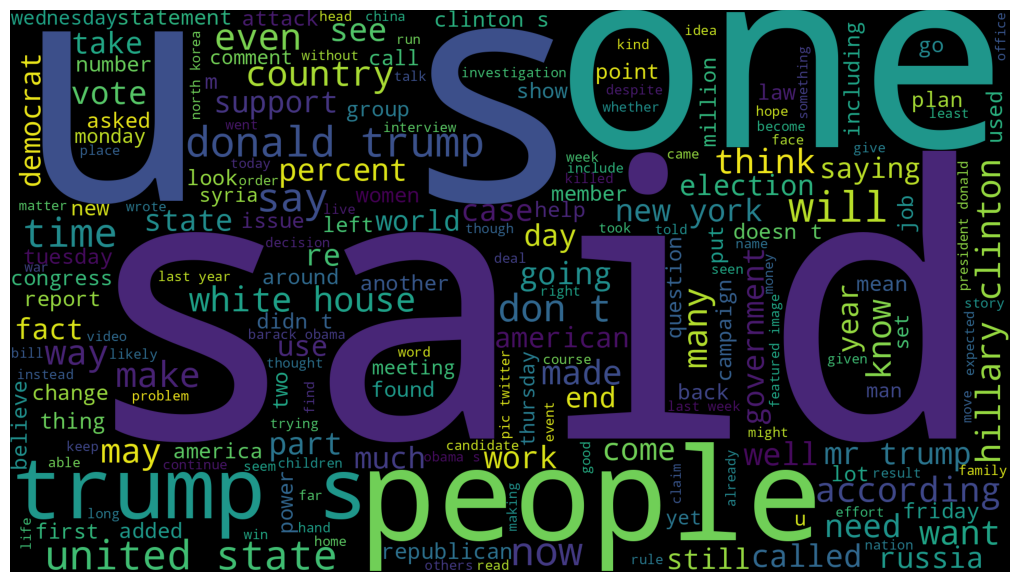

In [33]:
wcText = ''.join(str(df['text'].tolist()))
wordcloud = WordCloud(width=1920, height = 1080).generate(wcText)
figure = plt.figure(figsize=(10,10))
plt.imshow(wordcloud) # viusalize wordlcoud
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [34]:
article = df['text']
label = df['label']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.60)

In [37]:
vector = TfidfVectorizer()
xvector_train = vector.fit_transform(x_train)
xvector__test = vector.transform(x_test)

In [ ]:
model = LogisticRegression()
model.fit(xvector_train,y_train)
pred_lr=model.predict(xvector__test)
model.score(xvector__test, y_test)
print(classification_report(y_test, pred_lr))

In [46]:
def classify(x):
    if x == 0:
        return "The news are highly likely to be fake."
    elif x == 1:
        return "The news are higly likely to be real."

def example_article(news):
    # Create a DataFrame directly with news text
    news_df = pd.DataFrame({"text": [news]})
    # Apply the 'remove_special' function to preprocess the text
    news_df["text"] = news_df["text"].apply(remove_special)
    # Transform the text using the pre-defined vectorizer
    transformed_text = vector.transform(news_df["text"])
    # Predict using the pre-defined model
    prediction = model.predict(transformed_text)
    # Classify the prediction using the pre-defined classify function
    classification = classify(prediction)
    print(classification)
    return classification

In [45]:
import pickle

pickle.dump(vector, open('LR_vect.pkl', 'wb'))
pickle.dump(model, open('LR.pkl', 'wb'))

In [ ]:
example_article("The Oregon Supreme Court on Friday declined to hear a bid to remove former President Donald Trump from the 2024 ballot based on the 14th Amendment’s “insurrectionist ban,” saying it’s waiting for the US Supreme Court to rule on the issue.\
The ruling comes after Colorado and Maine kicked Trump off the ballot, after judges and officials determined that his role in the January 6 insurrection renders him ineligible for office. However, those decisions have been paused to allow for appeals.\
Trump has prevailed in other states, where courts dismissed lawsuits on procedural grounds and never grappled with the questions about January 6. He has beaten back challenges in Minnesota, Michigan, and Arizona – and California’s top election official recently decided to keep him on the ballot there as well.\
The Oregon court did not rule on the merits of the challenge, specifically citing the ongoing litigation at the US Supreme Court, which will hear oral arguments in the Colorado case on February 8.\
Lawsuits like these have been filed by Trump critics across the country who say they’re simply trying to enforce the 14th Amendment. They have said the “insurrection ban” was designed specifically to protect the country from someone like Trump – who, in their eyes, violated his oath of office when he tried overturn the 2020 election and incited the deadly Capitol riot.\
Trump has claimed that the lawsuits are a thinly veiled attempt to abuse the legal system and distort the Constitution in a way that blocks him from the White House because he can’t be beaten at the polls.\
The 14th Amendment, which was ratified after the Civil War, says US officials who take an oath to uphold the Constitution are disqualified from holding future office if they “engaged in insurrection” or have “given aid or comfort” to insurrectionists. However, the Constitution does not spell out how to enforce the ban, and the vague phrasing has led to questions about whether it even applies to the presidency.\
Free Speech For People, a liberal advocacy group, filed the lawsuit late last year directly at the Oregon Supreme Court.\
“The Oregon Supreme Court’s decision not to decide is disappointing,” the group said in a statement Friday. “Waiting until the U.S. Supreme Court issues its order only compresses the time that the Oregon Supreme Court may have to resolve the issues that may remain.”\
Trump campaign spokesman Steven Cheung praised the ruling.\
“Today’s decision in Oregon was the correct one,” he said in a statement. “President Trump urges the swift dismissal of all remaining, bad-faith, election interference 14th Amendment ballot challenges.”\
Oregon election officials say the names on the primary ballot must be finalized by March 21. The Oregon primary is May 21.\
The impact of potentially removing Trump from the primary ballot may be limited. Oregon is one of the final states to hold its GOP contest, so the nomination race may be decided by then. And Oregon’s GOP delegates will be allocated based on the results of a vote at the state party convention on May 25, according to the Republican National Committee.\
Oregon Secretary of State LaVonne Griffin-Valade, a Democrat, previously asked the court to throw out the case on procedural grounds.\
Essentially, Griffin-Valade argued it isn’t the right time to examine Trump’s eligibility for office. She said the Oregon law that requires her to determine whether a candidate has “become disqualified” applies only to the general election, not the GOP primary.\
Trump’s lawyers have said they agreed with Griffin-Valade that the case should be tossed on procedural grounds based on the state’s ballot access laws.")